# Finding the maximum value of a function

In statistical mechanics, more specificaly in critical phenomena, frequently we need to find the pseudo-critical temperature 
$({\tilde T}_c)$ for an specific statistical model. In general  ${\tilde T}_c$ corresponds to the temperature in which a given response function reachs its global maximum. Here I will expose a possible procedure to obtian ${\tilde T}_c$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Load in data

In [3]:
L = 48     # system size
mu = 2.30  # chemical potential

filename = 'avgrepgcan2_L'+str(L)+'_mu'+str('%.2f' %mu)+'.dat'
data = np.loadtxt(filename)

Two response function of interest are susceptibility of order parameter $\chi_X$ 
 
$$
\chi_X = \dfrac{L^2}{T}\left[ \left\langle X^2 \right\rangle - \left\langle X \right\rangle^2 \right] = \frac{L^2}{T}{\rm var}[X]
$$


and isothermal compressibility

$$\kappa_T=\dfrac{L^2}{k_BT}\left[ \dfrac{\left\langle N^2 \right\rangle - \left\langle N \right\rangle^2}
{\left\langle N \right\rangle^2}\right]$$

In the file loaded I have computed the ensemble averages of the order parameter $\left\langle X \right\rangle$ and number of particle $\left\langle N \right\rangle$ and their standard deviations.

The errors of properties are : 

$$\sigma_{\chi} = \sqrt{\sigma^2_{\langle X \rangle} + \sigma^2_{\langle X^2 \rangle}} \quad {\rm and} \quad
\sigma_{\kappa} = \sqrt{\sigma^2_{\langle N \rangle} + \sigma^2_{\langle N^2 \rangle}}$$

## Computing properties and erros

In [5]:
# temperature corresponds to column 1.
Tp = data[:,1]

#==================================================
#susceptibility
#==================================================
L2overTemp = ((L*L)/Tp)
# column 24 and 24 correspond to average of order parameter square
# and order parameter respectively
avgX = data[:,22]
avgX2= data[:,24]
chiX = L2overTemp*(avgX2- avgX*avgX)

# Propagating the standard deviation of average from simulations 
chiXERR = np.zeros(len(avgX),dtype=np.float64)

stdavgX  = data[:,23]
stdavgX2 = data[:,23]

#third equations
chiXERR = L2overTemp*np.sqrt(stdavgX**2 + stdavgX2**2)



#==================================================
#compressibility
#==================================================
avgN  = data[:,4]*(L*L) # xL^2 because I saved the density
avgN2 = data[:,28] 
kt   = L2overTemp*((avgN2 - avgN*avgN)/(avgN**2))

# Propagating the standard deviation of average from simulations 
ktERR = np.zeros(len(avgX),dtype=np.float64)

stdavgN = data[:,5]
stdavgN2= data[:,29] 


ktERR   = L2overTemp*np.sqrt((stdavgN2/avgN2)**2 + (stdavgN/avgN)**2)

# Ploting properties

Text(0.5, 0, '$T$')

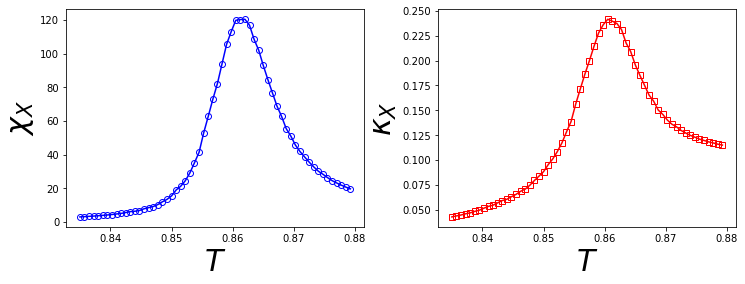

In [104]:
fig , ((ax1,ax2)) = plt.subplots(1,2, figsize=(12,4))
fig.subplots_adjust(wspace=0.25)

ax1.plot(Tp,chiX,'bo-',mfc='None')
ax1.set_ylabel('$\chi_X$',fontsize=30)
ax1.set_xlabel('$T$',fontsize=30)

ax2.plot(Tp,kt,'rs-',mfc='None')
ax2.set_ylabel('$\kappa_X$',fontsize=30)
ax2.set_xlabel('$T$',fontsize=30)

**OBS :** I didn't plot the error bars. Here I want to view if the behavior of the properties makes sense.

## Selecting points and fitting

We see that the properties were computed correctly. Now we need to obtain the temperature that corresponds to the global maximum. We will filter the points around the maximum~(not global maximum). I will use 5 points of offset.

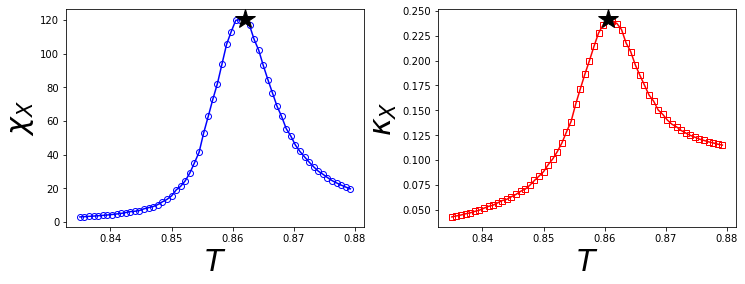

In [105]:
fig , ((ax1,ax2)) = plt.subplots(1,2, figsize=(12,4))
fig.subplots_adjust(wspace=0.25)

offset = 3 

#obtaining the temperature of maximum 
TempofMaxX = Tp[np.argmax(chiX)]
MaxofChi  = np.max(chiX)

ax1.plot(Tp,chiX,'bo-',mfc='None')
ax1.set_ylabel('$\chi_X$',fontsize=30)
ax1.set_xlabel('$T$',fontsize=30)
ax1.plot(TempofMaxX,MaxofChi,'k*',ms=20)


TempofMaxK = Tp[np.argmax(kt)]
MaxofKt  = np.max(kt)

ax2.plot(Tp,kt,'rs-',mfc='None')
ax2.set_ylabel('$\kappa_X$',fontsize=30)
ax2.set_xlabel('$T$',fontsize=30)
ax2.plot(TempofMaxK,MaxofKt,'k*',ms=20)

### $\chi_X$

Text(0.5, 0, '$T$')

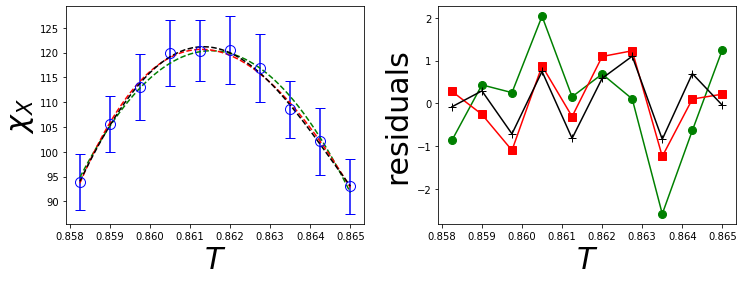

In [7]:
fig , ((ax1,ax2)) = plt.subplots(1,2, figsize=(12,4))
fig.subplots_adjust(wspace=0.25)

offset = 5

newTemp = Tp[np.argmax(chiX)-offset:np.argmax(chiX)+offset]
newchiX = chiX[np.argmax(chiX)-offset:np.argmax(chiX)+offset]
newErrchiX = chiXERR[np.argmax(chiX)-offset:np.argmax(chiX)+offset] 

# ploting considering the error
ax1.errorbar(newTemp,newchiX,yerr=newErrchiX,
             fmt='bo',mfc='None',ms=10,capsize=5)

# creating an array between max and min temperatures
xx = np.arange(newTemp[0],newTemp[-1],0.0000001)

# the errors are used as weigths of LSM
popt = np.polyfit(newTemp,newchiX,
                  w=1./(newErrchiX)**2,deg=2)
ax1.plot(xx,np.polyval(popt,xx),'g--')
ax2.plot(newTemp,newchiX - np.polyval(popt,newTemp),
         'g-o',ms=8)

popt = np.polyfit(newTemp,newchiX,
                  w=1./(newErrchiX)**2,deg=3)
ax1.plot(xx,np.polyval(popt,xx),'r--')
ax2.plot(newTemp,newchiX - np.polyval(popt,newTemp),
         'r-s',ms=8)

popt = np.polyfit(newTemp,newchiX,
                  w=1./(newErrchiX)**2,deg=4)
ax1.plot(xx,np.polyval(popt,xx),'k--')
ax2.plot(newTemp,newchiX - np.polyval(popt,newTemp),
         'k-+',ms=8)


ax1.set_ylabel('$\chi_X$',fontsize=30)
ax2.set_ylabel('residuals',fontsize=30)
ax1.set_xlabel('$T$',fontsize=30)
ax2.set_xlabel('$T$',fontsize=30)

### $\kappa_T$

Text(0.5, 0, '$T$')

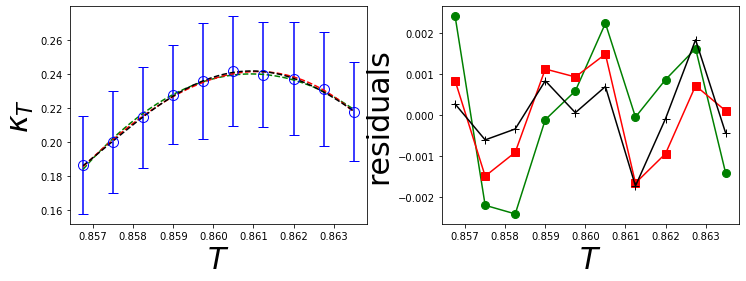

In [8]:
fig , ((ax1,ax2)) = plt.subplots(1,2, figsize=(12,4))
fig.subplots_adjust(wspace=0.25)

offset = 5

newTemp = Tp[np.argmax(kt)-offset:np.argmax(kt)+offset]
newkt   = kt[np.argmax(kt)-offset:np.argmax(kt)+offset]
newErrkt= ktERR[np.argmax(kt)-offset:np.argmax(kt)+offset] 

# ploting considering the error
ax1.errorbar(newTemp,newkt,yerr=newErrkt,
             fmt='bo',mfc='None',ms=10,capsize=5)

# creating an array between max and min temperatures
xx = np.arange(newTemp[0],newTemp[-1],0.0000001)

# the errors are used as weigths of LSM
popt = np.polyfit(newTemp,newkt,
                  w=1./(newErrkt)**2,deg=2)

ax1.plot(xx,np.polyval(popt,xx),'g--')
ax2.plot(newTemp,newkt - np.polyval(popt,newTemp),
         'g-o',ms=8)

popt = np.polyfit(newTemp,newkt,
                  w=1./(newErrkt)**2,deg=3)
ax1.plot(xx,np.polyval(popt,xx),'r--')
ax2.plot(newTemp,newkt - np.polyval(popt,newTemp),
         'r-s',ms=8)

popt = np.polyfit(newTemp,newkt,
                  w=1./(newErrkt)**2,deg=4)
ax1.plot(xx,np.polyval(popt,xx),'k--')
ax2.plot(newTemp,newkt - np.polyval(popt,newTemp),
         'k-+',ms=8)


ax1.set_ylabel('$\kappa_T$',fontsize=30)
ax2.set_ylabel('residuals',fontsize=30)
ax1.set_xlabel('$T$',fontsize=30)
ax2.set_xlabel('$T$',fontsize=30)

**Conclusion :** We observe that all cases the residuals are random around the zero. In general is adopted the lowest order that returns random residuals, however we will adopt the 3rd-order to improve the quality of fit. The order chosen is 3.

## Finding the maximum of poly

The maximum of poly will be determined through the $dp/dx=0$. The numerical derivative of a poly can be performed with the use of 
np.polyder. 

0.8598 +- 0.0071
0.8611 +- 0.0002


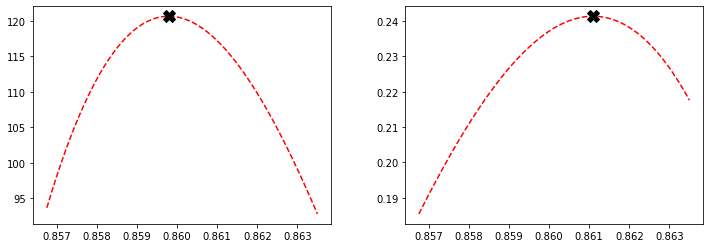

In [44]:
fig , ((ax1,ax2)) = plt.subplots(1,2, figsize=(12,4))
fig.subplots_adjust(wspace=0.25)

popt = np.polyfit(newTemp,newchiX,
                  w=1./(newErrchiX)**2,deg=3)


poly =  np.poly1d(popt)      #generating the poly
polyprime = np.polyder(poly) #differentiation
sol = np.roots(polyprime)    #roots of poly


#I will select the solution closest of maximum
distsol  = np.zeros(len(sol))
for j in range(len(sol)) : 
    distsol[j] = np.abs(sol[j] - newTemp[np.argmax(newchiX)])
    
    
finalsol = sol[np.argmin(distsol)]
#print(finalsol)

popt = np.polyfit(newTemp,newchiX,
                  w=1./(newErrchiX)**2,deg=3)
ax1.plot(xx,np.polyval(popt,xx),'r--')
ax1.plot(finalsol,np.polyval(popt,finalsol),
         'Xk',ms=12)

Errorchi = 0 
for i in range(len(newTemp)) : 
    Errorchi += ((newchiX[i]-np.polyval(popt,newTemp[i]))/newchiX[i])**2
    #print((newchiX[i] - np.polyval(popt,newTemp[i]))/newchiX[i])
    
Errorchi = np.sqrt(Errorchi/len(newTemp))

print('%.4f'%finalsol,'+-','%.4f'%Errorchi)
#=========================================================
#=========================================================
popt = np.polyfit(newTemp,newkt,
                  w=1./(newErrkt)**2,deg=3)


poly =  np.poly1d(popt)      #generating the poly
polyprime = np.polyder(poly) #differentiation
sol = np.roots(polyprime)    #roots of poly


#I will select the solution closest of maximum
distsol  = np.zeros(len(sol))
for j in range(len(sol)) : 
    distsol[j] = np.abs(sol[j] - newTemp[np.argmax(newkt)])
    
    
finalsol = sol[np.argmin(distsol)]

popt = np.polyfit(newTemp,newkt,
                  w=1./(newErrkt)**2,deg=3)
ax2.plot(xx,np.polyval(popt,xx),'r--')
ax2.plot(finalsol,np.polyval(popt,finalsol),
         'Xk',ms=12)

Errorkt = 0 
for i in range(len(newTemp)) : 
    Errorkt += ((newkt[i]-np.polyval(popt,newTemp[i]))/newkt[i])**2
    #print((newkt[i] - np.polyval(popt,newTemp[i]))/newkt[i])
    
Errorchi = np.sqrt(Errorkt/len(newTemp))

print('%.4f'%finalsol,'+-','%.4f'%Errorkt)